# Import Packages

In [677]:
import numpy as np
import pandas as pd

import os 
from os import walk
from os import path

import glob
import sys
import math
import re
import bangla

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup

from tensorflow.python.keras.preprocessing.text import Tokenizer

ModuleNotFoundError: No module named 'tensorflow'

# Declare Paths

In [646]:
Data = '/media/protik/Drive E/Pipilika/DataSets/Data/'
Codes = '/media/protik/Drive E/Pipilika/Codes/News Classification/'

# Load DataFrame

In [647]:
df = pd.read_csv('{}{}'.format(Data,"data.csv"))
df.head()

,News,Class
0,"ঢাকা, অক্টোবর ০৭ (বিডিনিউজ টোয়েন্টিফোর ডটকম) -...",sports
1,যে বিশ্বকাপে হামেশাই ৩০০ পেরোনো ইনিংসের দেখা ম...,sports
2,ক্রিকেটের শ্রেষ্ঠত্ব বিচারের সর্বোচ্চ মঞ্চ হলো...,sports
3,আট বছর আগের দুঃস্মৃতি আজও বুকে শেল বিঁধিয়ে দে...,sports
4,"ঢাকা, জানুয়ারি ৩০ (বিডিনিউজ টোয়েন্টিফোর ডটকম) ...",sports


In [648]:
df.shape

(22674, 2)

# Analyse Data

### Number of News for Each Group

In [649]:
def bar_plot(l):
    keys, counts = np.unique(l, return_counts=True)
    plt.barh(keys, counts)
    plt.figure(figsize=(15,20))
    plt.show()

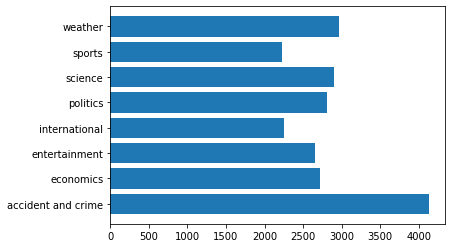

<Figure size 1080x1440 with 0 Axes>

In [650]:
classes = df['Class']
bar_plot(classes)

### Check for NaN Values

In [651]:
news_length = df['News'].str.len()
news_length = list(news_length)

found = False

for i in range(0,len(news_length)):
    x = news_length[i]
    if(np.isnan(x)):
        found = True
        print("Found a NaN value here: ", i)
        print("Class for this NaN value is: ", df['Class'][i])
        
if(not found):
    print("No NaN Value Found")

No NaN Value Found


### News Length Distribution

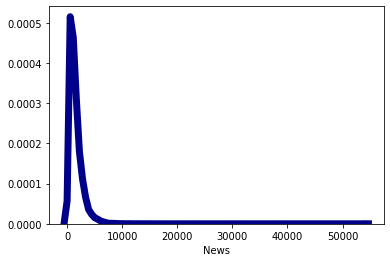

In [652]:
sns.distplot(df['News'].str.len(), hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'darkblue'},
             kde_kws={'linewidth': 7})

# Preprocessing

### Remove HTML Tags

In [653]:
def remove_html_tags(raw_review):
    review_text = BeautifulSoup(raw_review,'lxml').get_text()
    return review_text

df['News'] = [remove_html_tags(i) for i in df['News']]

### Remove Punctuations, Brackets and Special Characters

In [654]:
punctuation_signs = list("?!,;।:.-(){}[]/\+-_*@—#$%^<>=~`")

for punct_sign in punctuation_signs:
    df['News'] = df['News'].str.replace(punct_sign, ' ')

### Remove Escape Characters

In [655]:
def escape_ansi(line):
    line = line.replace('\n','')
    line = line.replace('\t','')
    line = line.replace("\'",'')
    line = line.replace("\"",'')
    line = line.replace("‘",'')
    line = line.replace("’",'')
    line = line.replace("  ",' ')
    line = line.replace("\xa0",' ')
    line = line.replace("\u2008",' ')
    return line

df['News'] = [escape_ansi(i) for i in df['News']]

### Remove Numbers

In [656]:
def escape_ansi(line):
    line = re.sub('[০-৯]+', 'সংখ্যা', line)
    line = re.sub('[0-9]+', 'সংখ্যা', line)
    return line

df['News'] = [escape_ansi(i) for i in df['News']]

### Embedding

In [661]:
def class_embedding(i):
    if(i=='accident and crime'):
        return 0
    elif(i=='economics'):
        return 1
    elif(i=='entertainment'):
        return 2
    elif(i=='international'):
        return 3
    elif(i=='politics'):
        return 4
    elif(i=='science'):
        return 5
    elif(i=='sports'):
        return 6
    elif(i=='weather'):
        return 7
        
df['Class'] = [class_embedding(i) for i in df['Class']]

### Shuffle DataSet

In [674]:
df = df.sample(frac=1).reset_index(drop=True)

In [675]:
df.head(10)

,News,Class
0,ওয়েস্ট ইন্ডিজ ক্রিকেট বোর্ডের রোষানলে পড়ে সম...,6
1,মারুফ মল্লিক বিডিনিউজ টোয়েন্টিফোর ডটকম পরিবেশ ...,7
2,রূপালী লাইফ ইনস্যুরেন্স ফার্স্ট মিউচুয়াল ফান্...,1
3,থাইল্যান্ডের অপসারিত সাবেক প্রধানমন্ত্রী ইংলাক...,3
4,মিসরের সংখ্যা জন কপটিক খ্রিষ্টানকে শিরশ্ছেদের ...,3
5,তিনি টিভির রিয়্যালিটি শোর তারকা কিম কারডাশিয়...,3
6,বিষ টেলিছবিতে নওশাবা ও মিলন লিখেছেন আবদুল্লাহ ...,2
7,বাংলাদেশের ক্রিকেটের সবচেয়ে বড় বিজ্ঞাপন সাকি...,6
8,পাকিস্তানে গত শুক্রবার দুই জঙ্গির মৃত্যুদণ্ড ক...,3
9,প্রযুক্তিবিষয়ক সাইট দ্য ভার্জ এক প্রতিবেদনে জা...,5


### Splitting Train and Test Set

In [676]:
x_train = df.loc[:17999, 'News'].values
y_train = df.loc[:17999, 'Class'].values
x_test = df.loc[18000:, 'News'].values
y_test = df.loc[18000:, 'Class'].values